# Importing required libraries

In [1]:
import numpy as np
import pandas as pd

# Reading the data files

In [11]:
import os
print(os.listdir('../Data/world-happiness-index-dataset/'))
data = pd.read_csv('../Data/world-happiness-index-dataset/2019.csv',sep=',')

['2019.csv', '2018.csv', '2015.csv', '2016.csv', '2017.csv']


# Getting an overview of the data

In [12]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [14]:
data.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


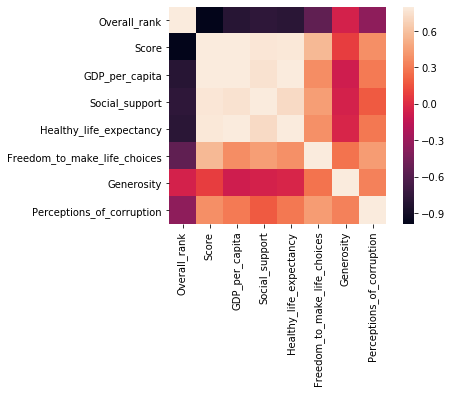

In [15]:
import seaborn as sns
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [33]:
labels = ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
X=data[labels].values

In [17]:
y=data[['Score']].values

In [36]:
X = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)

$$X=TP^T$$

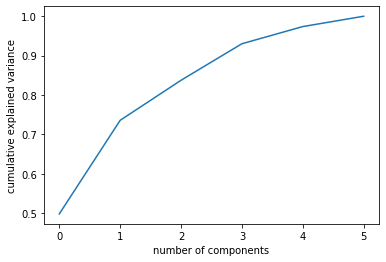

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
P=pca.components_
T = X.dot(P.T)

In [39]:
print(P)

[[-0.51459462 -0.49064918 -0.51056655 -0.3809577  -0.05948407 -0.29173692]
 [-0.2278181  -0.22028375 -0.19227192  0.35212182  0.69350669  0.50760633]
 [-0.02380878  0.28141961  0.02808632  0.11855036  0.58081716 -0.7536873 ]
 [ 0.24040185 -0.0633134   0.27480575 -0.81042518  0.41891464  0.17436089]
 [-0.18376376  0.77125906 -0.50935561 -0.24006682 -0.00525099  0.23299691]
 [ 0.76887077 -0.1808102  -0.60547761  0.04905325  0.0514247  -0.06701907]]


First component  [-0.51459462 -0.49064918 -0.51056655 -0.3809577  -0.05948407 -0.29173692]


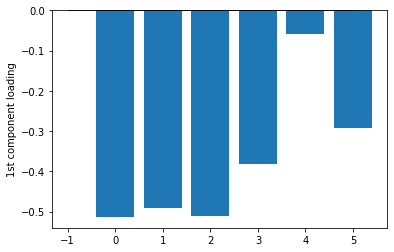

['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']


In [40]:
#Loading of the first component
print("First component ", P.T[:,0])
x = np.arange(6)
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.ylabel("1st component loading")
plt.show()
print(labels)

Second component  [-0.2278181  -0.22028375 -0.19227192  0.35212182  0.69350669  0.50760633]


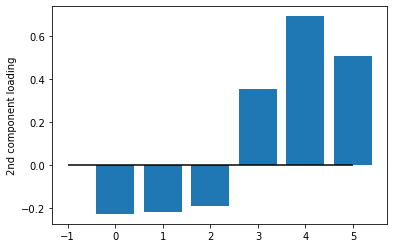

In [41]:
#Loading of the first component
print("Second component ", P.T[:,1])
x = np.arange(6)
plt.bar(x, height= P.T[:,1])
plt.hlines(0,-1,5)
#plt.xticks(x+.1, ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'])
plt.ylabel("2nd component loading")
plt.show()

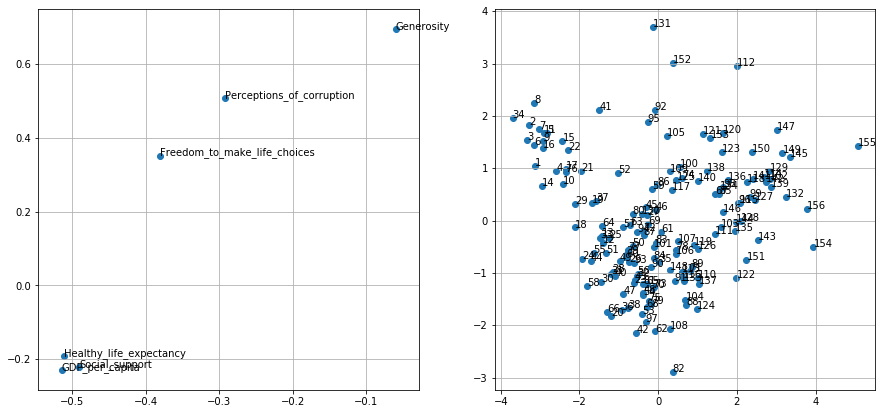

In [42]:
'GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'
variables = ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
n = np.linspace(1,len(X),len(X)).astype(int)
n = n.tolist()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 7))
ax1.scatter(P[0,:], P[1,:])
ax1.grid()
for i, txt in enumerate(variables):
    ax1.annotate(txt, (P[0,i], P[1,i]))
    
plt.grid()
#plt.show()

#fig, ax = plt.subplots()
ax2.scatter(T[:,0], T[:,1])
ax2.grid()
for i, txt in enumerate(n):
    ax2.annotate(txt,(T[i,0], T[i,1]))
plt.grid()
plt.show()

In [43]:
print(data['Country_or_region'][1])
print(data['Country_or_region'])

Denmark
0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country_or_region, Length: 156, dtype: object


# Reference

<a href='https://www.kaggle.com/unsdsn/world-happiness'>Data Source</a>

# To Do

* Study the infludence of normalization

* Improve the visualization (try putting the laels of the countries on the score plot)

* Explore other PCs

* Explain the contrbution of the different original features to the principal components

* Interpret the score plot in the light of th eloading plots